<a href="https://colab.research.google.com/github/Tarun-23113/My_Python_Projects/blob/master/Plotting_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


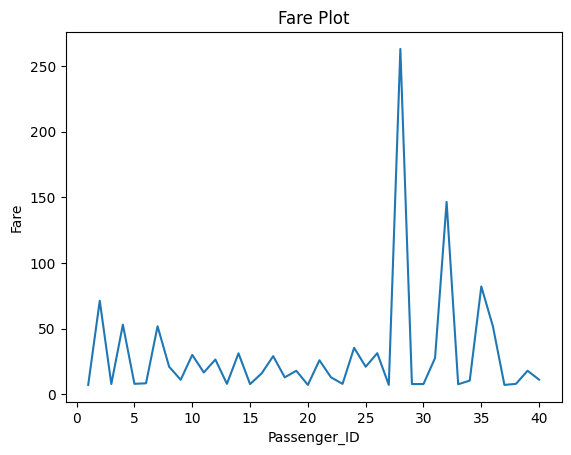

In [ ]:
plt.plot(df['PassengerId'].head(40), df['Fare'].head(40))
plt.title('Fare Plot')
plt.xlabel('Passenger_ID')
plt.ylabel('Fare')
plt.show()

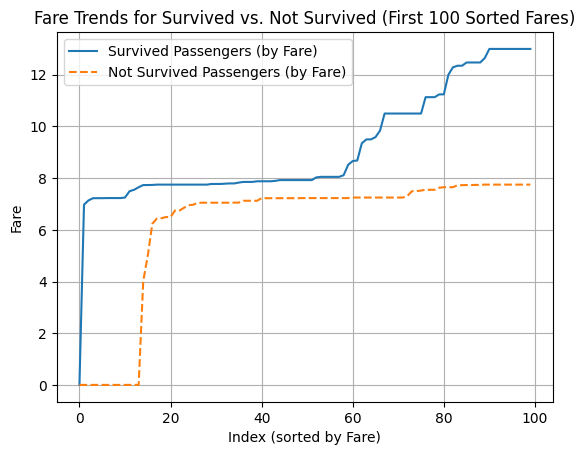

In [ ]:
# Sort by Fare to make the line plots more illustrative for legend
df_sorted_fare = df.sort_values('Fare').reset_index(drop=True)

# Separate data for survived and not survived
survived_fare = df_sorted_fare[df_sorted_fare['Survived'] == 1]['Fare'].head(100)
not_survived_fare = df_sorted_fare[df_sorted_fare['Survived'] == 0]['Fare'].head(100)

plt.plot(range(len(survived_fare)), survived_fare, label="Survived Passengers (by Fare)")
plt.plot(range(len(not_survived_fare)), not_survived_fare, label="Not Survived Passengers (by Fare)", linestyle='--')

plt.title("Fare Trends for Survived vs. Not Survived (First 100 Sorted Fares)")
plt.xlabel("Index (sorted by Fare)")
plt.ylabel("Fare")
plt.legend() # Displays the legend
plt.grid(True) # Adds a grid
plt.show()

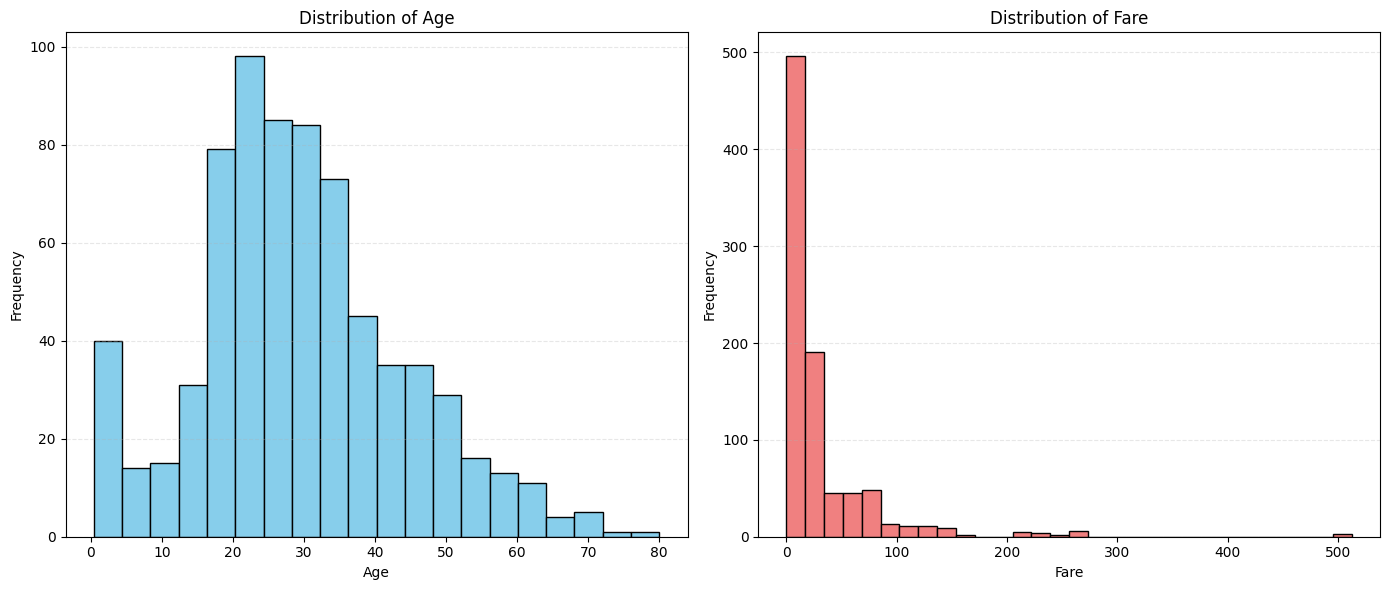

In [ ]:
# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Subplot 1: Histogram of Age
# Drop NaNs from Age for this plot
axes[0].hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', linestyle='--', alpha=0.3)

# Subplot 2: Histogram of Fare (log scale often useful for highly skewed data like Fare)
axes[1].hist(df['Fare'], bins=30, color='lightcoral', edgecolor='black')
axes[1].set_title('Distribution of Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', linestyle='--', alpha=0.3)
# You could use axes[1].set_yscale('log') here if the distribution is too skewed

plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

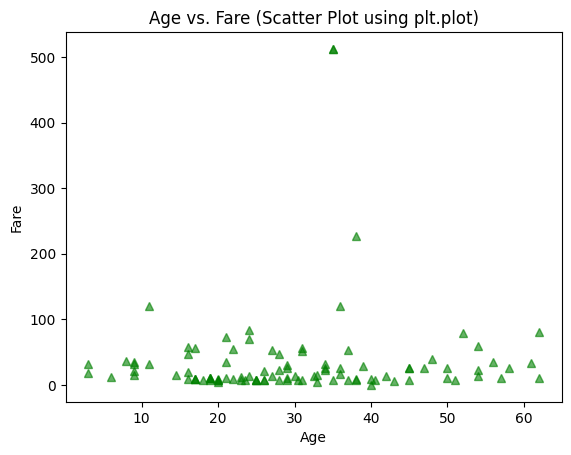

In [ ]:
df_clean = df.dropna(subset=['Age', 'Fare']).sample(n=100, random_state=42) # Take 100 random samples
plt.plot(df_clean['Age'], df_clean['Fare'], marker='^', linestyle='', alpha=0.6, color='green')
plt.title("Age vs. Fare (Scatter Plot using plt.plot)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

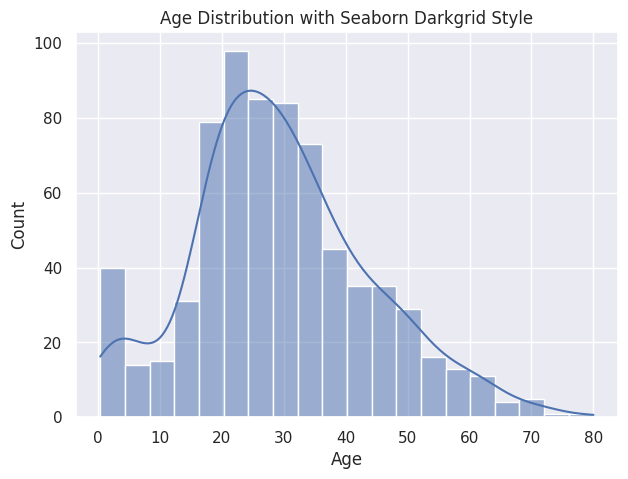

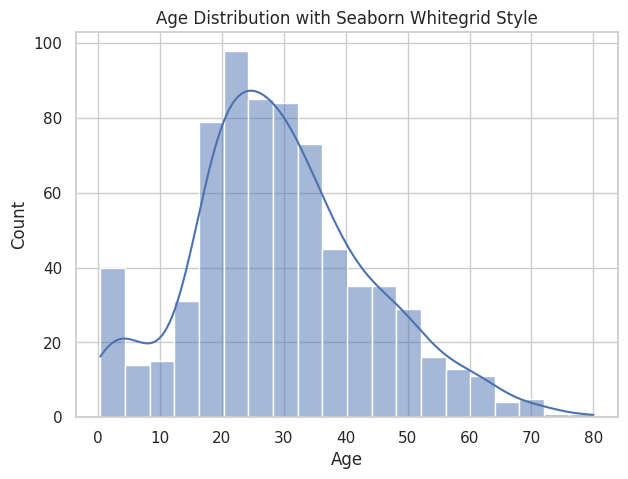

In [ ]:
import seaborn as sns
# Set a darkgrid theme
sns.set_theme()
sns.set_style("darkgrid")

plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Age', kde=True, bins=20)
plt.title("Age Distribution with Seaborn Darkgrid Style")
plt.show()

# Change to a whitegrid theme for comparison
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Age', kde=True, bins=20)
plt.title("Age Distribution with Seaborn Whitegrid Style")
plt.show()

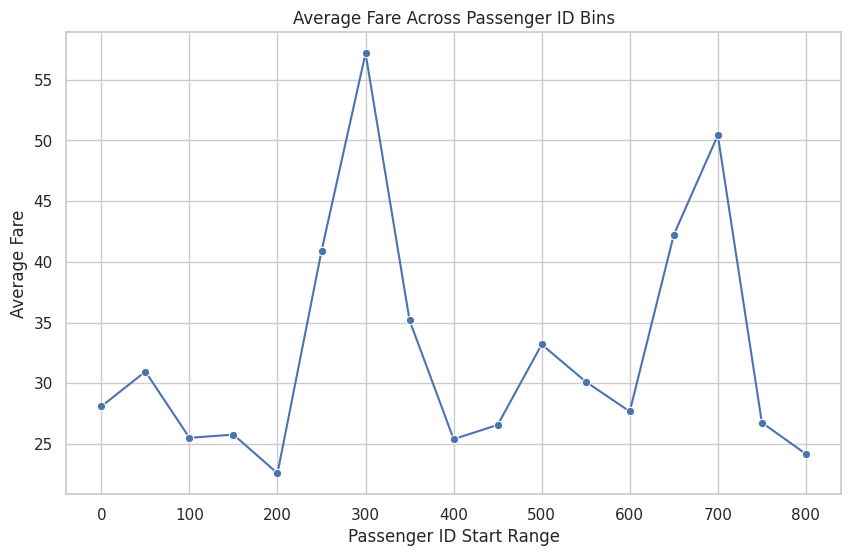

In [ ]:
# Create bins for PassengerId to calculate average Fare
df['PassengerId_Bin'] = pd.cut(df['PassengerId'], bins=np.arange(0, 900, 50), right=False, labels=False)
df_avg_fare = df.groupby('PassengerId_Bin')['Fare'].mean().reset_index()
df_avg_fare['PassengerId_Start'] = df_avg_fare['PassengerId_Bin'] * 50

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_avg_fare, x='PassengerId_Start', y='Fare', marker='o')
plt.title("Average Fare Across Passenger ID Bins")
plt.xlabel("Passenger ID Start Range")
plt.ylabel("Average Fare")
plt.grid(True)
plt.show()

<ipython-input-15-d994d8a507c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Fare', palette='viridis')


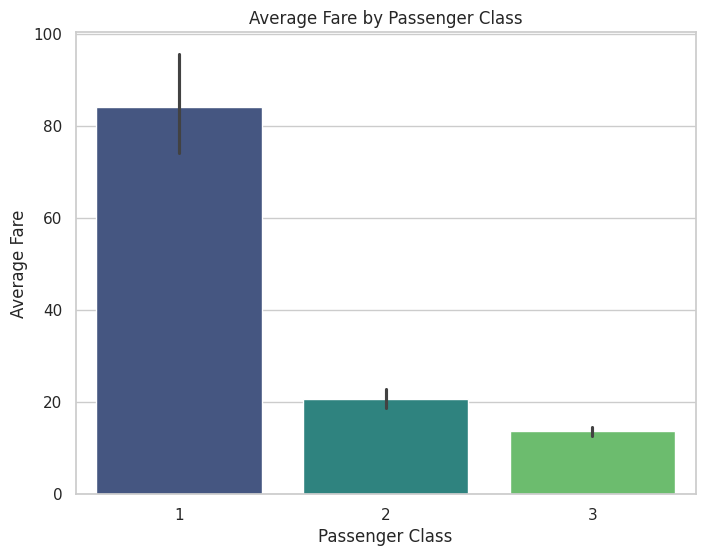

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Pclass', y='Fare', palette='viridis')
plt.title("Average Fare by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare")
plt.show()

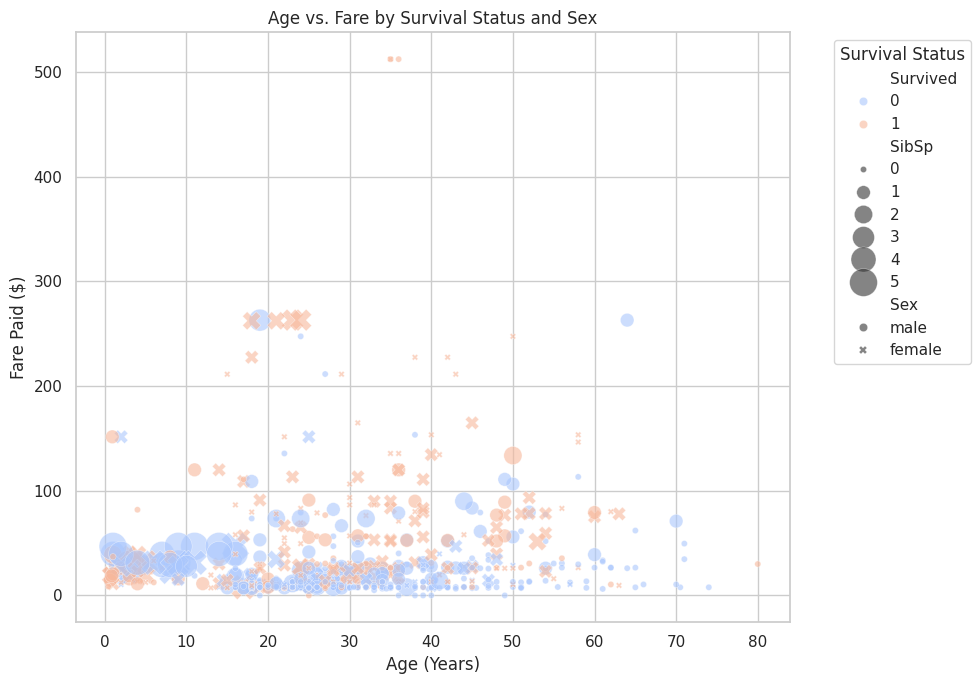

In [ ]:
# Drop rows with NaN in Age for cleaner scatter plot, as hue/style will propagate NaNs
df_scatter = df.dropna(subset=['Age', 'Fare', 'Survived'])

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_scatter,
    x='Age',
    y='Fare',
    hue='Survived', # Color by survival status (0=No, 1=Yes)
    style='Sex',    # Use different markers for Male/Female
    size='SibSp',   # Make marker size proportional to SibSp (siblings/spouse aboard)
    sizes=(20, 400), # Range for marker sizes
    alpha=0.6,       # Transparency
    palette='coolwarm' # Choose a color palette
)
plt.title("Age vs. Fare by Survival Status and Sex")
plt.xlabel("Age (Years)")
plt.ylabel("Fare Paid ($)")
plt.legend(title='Survival Status', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.tight_layout()
plt.show()

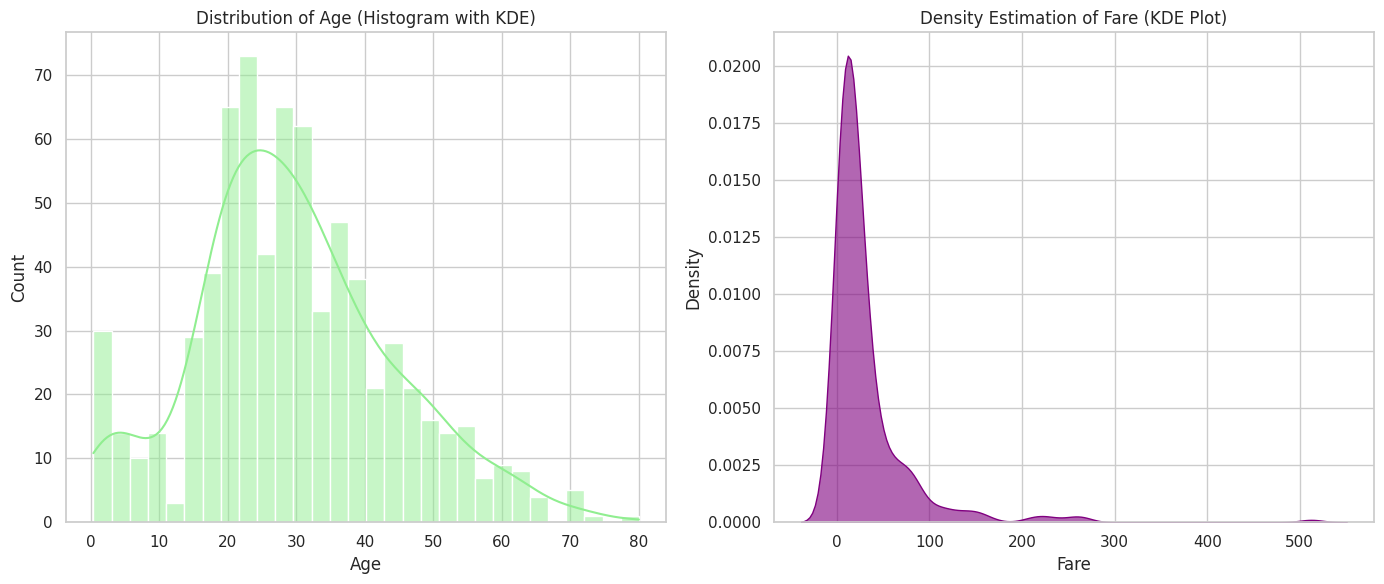

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of Age, with KDE overlay
sns.histplot(data=df, x='Age', bins=30, kde=True, ax=axes[0], color='lightgreen')
axes[0].set_title('Distribution of Age (Histogram with KDE)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# KDE plot of Fare, filled
sns.kdeplot(data=df, x='Fare', fill=True, ax=axes[1], color='purple', alpha=0.6)
axes[1].set_title('Density Estimation of Fare (KDE Plot)')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Density')
# For Fare, a log scale might be useful if the distribution is very skewed
# axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

<ipython-input-19-a9f8372205c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='pastel', ax=axes[0])
<ipython-input-19-a9f8372205c4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Embarked', palette='dark', ax=axes[1])


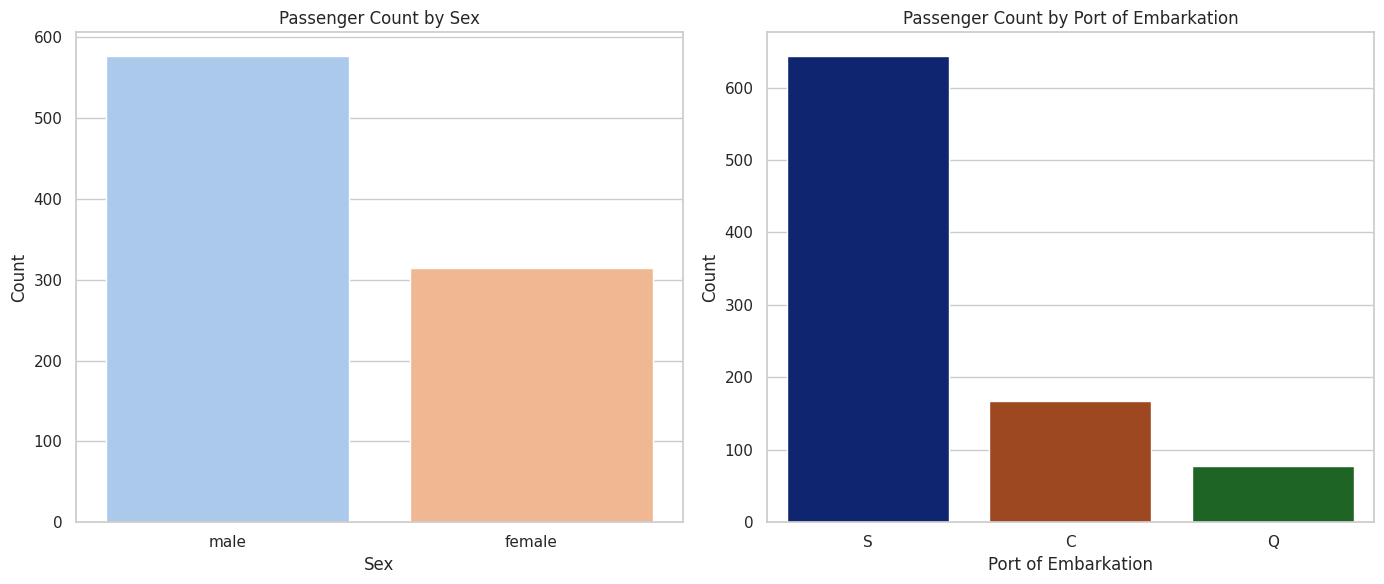

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Count plot for Sex
sns.countplot(data=df, x='Sex', palette='pastel', ax=axes[0])
axes[0].set_title('Passenger Count by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')

# Count plot for Embarked
sns.countplot(data=df, x='Embarked', palette='dark', ax=axes[1])
axes[1].set_title('Passenger Count by Port of Embarkation')
axes[1].set_xlabel('Port of Embarkation')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()